In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Introduction**

In this project, I will build a predictive model that will accurately detech which texts are spam. The dataset is obtained from kaggle: https://www.kaggle.com/uciml/sms-spam-collection-dataset?select=spam.csv

## **Understanding the data**

The dataset in in csv format and will be uploaded into the notebook:

In [2]:
# Importing the data into the notebook

df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Displaying the first 5 rows of the dataset

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# Dropping columns

df = df.drop(labels = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)

In [6]:
# First 5 rows of the dataset after dropping 

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print("Number of rows in the dataset:",df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 5572
Number of columns in the dataset: 2


In [8]:
# Renaming the column

df = df.rename(columns={"v1":"Spam","v2":"Text"})
df.head()

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Changing the Spam column into 0 and 1
# 0: ham
# 1: Spam

df = df.replace({'ham':0,'spam':1})
df.head()

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Displaying the text from the first ham message

df['Text'].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [11]:
# Displaying the text from the first spam message

df[df['Spam']==1]['Text'].iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [12]:
# Number of ham and spam messages in the dataset

print("Number of ham messages in the dataset:",df.groupby('Spam').size()[0])
print("Number of spam messages in the dataset:", df.groupby('Spam').size()[1])

Number of ham messages in the dataset: 4825
Number of spam messages in the dataset: 747


In [13]:
# Checking whether there is empty data in the dataset
# No empty data in the dataset

df.isna().sum()

Spam    0
Text    0
dtype: int64

# **Splitting the dataset**

Before going further into the analysis, let us split our dataset into training set and test set. <code> train_data </code> is stored for future text analysis.

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split

# Random state is for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

train_data = pd.concat([X_train,y_train], axis = 1)
train_data.head()

,Text,Spam
1978,No I'm in the same boat. Still here at my moms...,0
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1
3935,They r giving a second chance to rahul dengra.,0
4078,O i played smash bros &lt;#&gt; religiously.,0
4086,PRIVATE! Your 2003 Account Statement for 07973...,1


## **Understanding the text**

For this section, I will be using the training sets to understand the text better. 

### Text Length

Now that we already understand the dataset, we can start model the data. I will try to explore the text deeper to further differentiate between ham email text and spam text.

First, I will make a visualization to whether the length of the text differentiate ham and spam message.

In [16]:
# Length column describing the length of the text message

train_data['Length'] = train_data['Text'].str.len()
train_data.head()

,Text,Spam,Length
1978,No I'm in the same boat. Still here at my moms...,0,83
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1,137
3935,They r giving a second chance to rahul dengra.,0,46
4078,O i played smash bros &lt;#&gt; religiously.,0,46
4086,PRIVATE! Your 2003 Account Statement for 07973...,1,148


I will plot overlaid histogram to visualize the length of the text in ham and spam message. Then, I will use describe the statistic in ham and spam message.

In [17]:
X_train_ham_length = train_data[train_data['Spam']==0]['Length']
X_train_spam_length = train_data[train_data['Spam']==1]['Length']

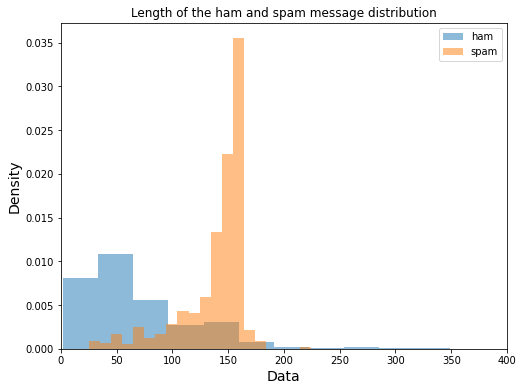

In [18]:
plt.figure(figsize=(8,6))
plt.hist(X_train_ham_length, bins=20, alpha=0.5, label="ham", density = True)
plt.hist(X_train_spam_length, bins=20, alpha=0.5, label="spam", density = True)


plt.xlim([0,400])
plt.xlabel('Data',size = 14)
plt.ylabel('Density',size = 14)
plt.title('Length of the ham and spam message distribution')
plt.legend()
plt.show();

In [19]:
# Further description on the ham length dataset

print(X_train_ham_length.describe())

count    3860.000000
mean       70.588342
std        55.674169
min         2.000000
25%        33.000000
50%        52.000000
75%        91.250000
max       632.000000
Name: Length, dtype: float64


In [20]:
# Further description on the spam length dataset

print(X_train_spam_length.describe())

count    597.000000
mean     139.206030
std       29.024974
min       25.000000
25%      134.000000
50%      150.000000
75%      158.000000
max      224.000000
Name: Length, dtype: float64


From the histogram and statistic table, we can see that overall the length of spam message is bigger than the length of ham message.

To verify my findings, I will use two sample unpaired z-test to see whether the length of ham message is overall bigger or smaller than the length of spam message. I use the significance level of 0.10. 

In [21]:
from scipy.stats import norm

In [22]:
# Input: compare (0=">", 1="<")
# Output: "False" means Hypothesis rejected, "True" means Hypothesis accepted
def z_test(compare,ham_desc,spam_desc):
  if compare==0: # ham > spam
    x=(ham_desc.describe()[1]-spam_desc.describe()[1])/((((ham_desc.describe()[2]**2)/4825)+(((spam_desc.describe()[2])**2)/747)))**0.5
    p=norm.cdf(x)>0.10
    display(p)
  if compare==1: # ham < spam
    x=(ham_desc.describe()[1]-spam_desc.describe()[1])/((((ham_desc.describe()[2]**2)/4825)+(((spam_desc.describe()[2])**2)/747)))**0.5
    p=(1-norm.cdf(x))>0.10
    display(p)

In [23]:
# Testing whether overall length of ham message < length of spam message

z_test(1,X_train_ham_length,X_train_spam_length)

True

This means that the length of ham message is generally smaller than the length of spam message
.

### Total Punctuation

Now, I will analyze the use of punctuation on both ham and spam message, and try to compare the use of punctuation on both messages.

In [24]:
train_data[train_data['Spam']==0]['Text']

1978    No I'm in the same boat. Still here at my moms...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4919     G says you never answer your texts, confirm/deny
4696    Okey dokey, iÛ÷ll be over in a bit just sorti...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Text, Length: 3860, dtype: object

In [25]:
def split(word):
    return [char for char in word]

In [26]:
# List of punctuation

import string
list_punctuation = np.array(split(string.punctuation))

In [27]:
# Counting how many punctuations on each text

for i in range(len(list_punctuation)):
  train_data[list_punctuation[i]] = train_data['Text'].str.count("\\"+list_punctuation[i])

In [28]:
# Displaying the dataframe after counting each punctuations

train_data.head(1)

,Text,Spam,Length,!,"""",#,$,%,&,',(,),*,+,",",-,.,/,:,;,<,=,>,?,@,[,\,],^,_,`,{,|,},~
1978,No I'm in the same boat. Still here at my moms...,0,83,0,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I want to visualize how the number of punctuations in ham and spam messages differ. I will plot using the overlaid histogram and uses the same process as before.

In [29]:
# Constructing dataframe of total number of punctuations on each text

punctuation_array = train_data.iloc[:,3:].to_numpy()
punctuation_array_sum = []

for i in range(len(punctuation_array)):
  punc_array = sum(punctuation_array[i])
  punctuation_array_sum = np.append(punctuation_array_sum,punc_array)

df_punc = pd.DataFrame(data = [train_data['Spam'],punctuation_array_sum]).T
df_punc = df_punc.rename(columns = {"Unnamed 0":"Total Punctuations"})
df_punc.head()

,Spam,Total Punctuations
1978,0.0,6.0
3989,1.0,3.0
3935,0.0,15.0
4078,0.0,1.0
4086,1.0,4.0


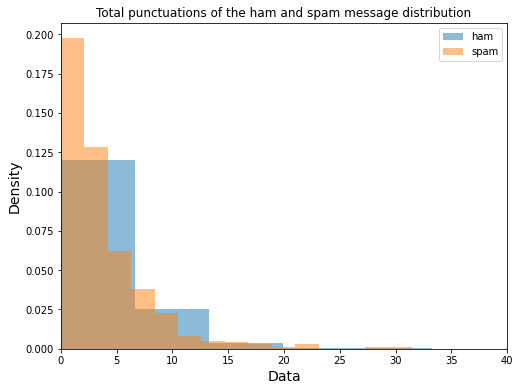

In [30]:
# Plotting overlaid histogram 

df_ham_punc = df_punc[df_punc['Spam']==0]
df_spam_punc = df_punc[df_punc['Spam']==1]

plt.figure(figsize=(8,6))
plt.hist(df_ham_punc['Total Punctuations'], bins=20, alpha=0.5, label="ham", density = True)
plt.hist(df_spam_punc['Total Punctuations'], bins=20, alpha=0.5, label="spam", density = True)

plt.xlim([0,40])
plt.xlabel('Data',size = 14)
plt.ylabel('Density',size = 14)
plt.title('Total punctuations of the ham and spam message distribution')
plt.legend()
plt.show();

In [31]:
# Further description on the ham punctuation dataset

df_ham_punc['Total Punctuations'].describe()

count    3094.000000
mean        4.252101
std         4.825348
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: Total Punctuations, dtype: float64

In [32]:
# Further description on the spam punctuation dataset

df_spam_punc['Total Punctuations'].describe()

count    475.000000
mean       4.141053
std        4.355401
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       42.000000
Name: Total Punctuations, dtype: float64

In [33]:
# Testing whether overall Total Punctuation of ham message < Total Punctuation of spam message

z_test(1,df_ham_punc['Total Punctuations'],df_spam_punc['Total Punctuations'])

True

Thus, overall, the total punctuations of ham message is less than that of spam message.

### Word usage

In [34]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In this section, I want to find unique words that differentiate between ham message and spam message. To accomplish this, first, I want to do some data cleaning and NLP to the text message. The data cleaning process and NLP is described below:

In [35]:
#Remove Digits
#This function will remove any digit for every entry in the list. 
def removeDigit(lst): 
    pattern = '[0-9]'
    lst = [re.sub(pattern, '', i) for i in lst] 
    return lst

#Combining stopwords (stop words are commonly used words that are ignored but still doesn't change the meaning of the sentence. By
# removing them we can focus on the importahnt words instead.)
# I found stopwords_json from internet (an addition to the english stop words). Since the text are only in english, only english stop words are used
stopwords_json = {"en":["a","",",.","'ve","ca","\"","'","'s","'m","'d","n't","na","gon","'re","tha","''","``","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords.
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

#Lemmatization function (this function give part of speech (POS) tag to each word. Example: mother (noun - NN))
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

#Function that tokenize and lemmatize the text (processing the raw text)
def preprocess_text(text):
  #Tokenizing the text (divide into tokens). Example: "My name is William" into ["My","name","is","William"]
  wordTokenization = word_tokenize(text)
  #Change all capital letter to lower case
  wordTokenization = list(map(str.lower, wordTokenization))
  #remove all digits
  wordTokenization = removeDigit(wordTokenization)
  #remove all entry of the list that are part of the combined stop words
  wordTokenization = [word for word in wordTokenization if word not in stoplist_combined]
  #Lemmatization is the process of changing words into their root form. 
  wnl = WordNetLemmatizer()
  wordLemmatize = [wnl.lemmatize(word.lower(), pos = penn2morphy(tag)) for word, tag in pos_tag(wordTokenization)] 
  #Last cleaning process (remove punctuation and digit)
  wordLemmatize = [word for word in wordLemmatize if word not in stoplist_combined and not word.isdigit()]
  wordLemmatize = [''.join(c for c in s if c not in punctuation) for s in wordLemmatize]
  wordLemmatize = [s for s in wordLemmatize if s]
  wordLemmatize = [word for word in wordLemmatize if word.isalpha()]
  return wordLemmatize

Then, I proceed into cleaning my dataset.

In [36]:
# Storing the 'Text' column into an array

df_ham = train_data[train_data['Spam']==0]['Text'].values
df_spam = train_data[train_data['Spam']==1]['Text'].values

In [37]:
# Cleaning the text data

ham_cleaned=[]
spam_cleaned=[]

for i in range(len(df_ham)):
  cleaning=preprocess_text(df_ham[i])
  joining=' '.join(cleaning)
  ham_cleaned=np.append(ham_cleaned, joining)

for i in range(len(df_spam)):
  cleaning=preprocess_text(df_spam[i])
  joining=' '.join(cleaning)
  spam_cleaned=np.append(spam_cleaned, joining)

ham_join_cleaned=' '.join(ham_cleaned)
spam_join_cleaned=' '.join(spam_cleaned)


After that, we can find top 50 unique words that differentiate between ham message and spam message.

In [38]:
def df_groupby(text):
    """ Input is the joined text after splitting (ex: [train_ham_join_cleaned.split()]).
    The output will be the top 100 most used words displayed in a dataframe
    """
    df = pd.DataFrame(text).transpose()
    df.columns = ['words']
    return df.groupby('words').size().sort_values(ascending = False).head(100)

In [39]:
# Listing top 100 words used in ham email
ham_words = df_groupby([ham_join_cleaned.split()])

# Listing top 100 words used in spam email
spam_words = df_groupby([spam_join_cleaned.split()])

ham_words = set(ham_words.reset_index()['words'])
spam_words = set(spam_words.reset_index()['words'])

print('------------------------------------------------')
print("unique words that differentiates the spam email with ham email:")
print('------------------------------------------------')
print(spam_words.difference(ham_words))

------------------------------------------------
unique words that differentiates the spam email with ham email:
------------------------------------------------
{'txt', 'double', 'hr', 'mobileupd', 'collection', 'uk', 'sae', 'live', 'date', 'ringtone', 'chat', 'pound', 'top', 'pic', 'gift', 'nokia', 'camera', 'cost', 'rate', 'http', 'apply', 'delivery', 'min', 'voucher', 'charge', 'pmin', 'contact', 'word', 'network', 'win', 'weekly', 'select', 'land', 'await', 'holiday', 'music', 'ppm', 'award', 'video', 'enter', 'po', 'urgent', 'orange', 'game', 'yr', 'match', 'sm', 'prize', 'poly', 'mobile', 'receive', 'price', 'mob', 'draw', 'box', 'pmsg', 'end', 'show', 'mths', 'landline', 'pobox', 'valid', 'cash', 'customer', 'service', 'attempt', 'claim', 'colour', 'st', 'guarantee', 'bonus', 'code', 'final', 'update', 'line', 'collect', 'offer', 'chance', 'entry', 'tone'}


In [40]:
# Storing the unique words
words = spam_words.difference(ham_words)

# **Modeling**

## Logistic Regression

After we understand the text from the training data. We can start modelling the training data. I will use Logistic Regression in the modeling process. Note that the Logistic Regression function already use $L_2$ loss, which avoid overfitting due to huge amount of features.

I will use <code> words_in_texts </code> function to find whether the text message contains the list of words. 

In [41]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

In [42]:
X_train = train_data.iloc[:,2:]
train_array = words_in_texts(words,train_data['Text'])
X_train = np.hstack((X_train,train_array))
print("Total number of features is", len(X_train[0]))
X_train

Total number of features is 113


array([[ 83,   0,   0, ...,   0,   0,   0],
       [137,   0,   0, ...,   0,   0,   0],
       [ 46,   0,   0, ...,   1,   0,   0],
       ...,
       [ 45,   0,   0, ...,   0,   0,   0],
       [ 26,   0,   0, ...,   0,   0,   0],
       [ 35,   0,   0, ...,   0,   0,   0]])

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.96881310298407


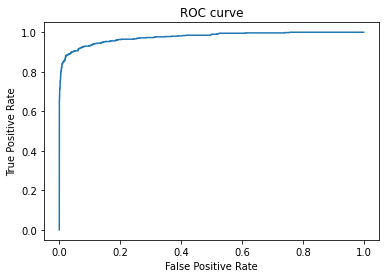

In [44]:
# Plotting ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, 
                               model.predict_proba(X_train)[:, 1])


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

It seems the training accuracy is really high, this means that the model fits to the training data. 

## Prediction on test data

Next, I will fit my model into my training data. The function below will repeat the same feature engineering process as I did in the training data.

In [45]:
test_data = pd.concat([X_test,y_test], axis = 1)
test_data.head()

,Text,Spam
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t...",0
944,I sent my scores to sophas and i had to do sec...,0
1044,We know someone who you know that fancies you....,1
2484,Only if you promise your getting out as SOON a...,0
812,Congratulations ur awarded either å£500 of CD ...,1


In [53]:
def process_test(test_data):
  """
  Input: The test_data stored above
  Output: design matrix of the test_data
  """
  # Computing the length of the text
  test_data['Length'] = test_data['Text'].str.len()

  # Computing the number of punctuations in the text
  for i in range(len(list_punctuation)):
    test_data[list_punctuation[i]] = test_data['Text'].str.count("\\"+list_punctuation[i])
 
  # Further feature engineering
  X_test = test_data.iloc[:,2:]
  test_array = words_in_texts(words,test_data['Text'])
  X_test = np.hstack((X_test,test_array))
  return X_test

In [54]:
# Repeating the feature engineering process in the test set

X_test = process_test(test_data)

Next, we will access the test accuracy using the model.

In [58]:
# prediction on test set
y_pred=model.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.9542600896860987


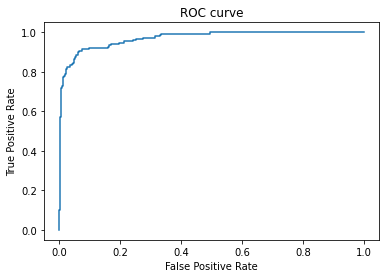

In [57]:
# Plotting ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, 
                               model.predict_proba(X_test)[:, 1])


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

The test accuracy reached up to 95.4%, which is really high. This means that our model is highly generalizable.